In [1]:
import numpy as np 
import pandas as pd 
import os

test_df = pd.read_csv("../input/plant-pathology-2020-fgvc7/test.csv")
train_df = pd.read_csv("../input/plant-pathology-2020-fgvc7/train.csv")

In [2]:
test_df.shape, train_df.shape

((1821, 1), (1821, 5))

In [3]:
train_df.sample(10)

image_id  healthy  multiple_diseases  rust  scab
1590  Train_1590        1                  0     0     0
553    Train_553        0                  0     1     0
345    Train_345        0                  0     1     0
1382  Train_1382        0                  0     0     1
1582  Train_1582        0                  0     0     1
1554  Train_1554        0                  1     0     0
1696  Train_1696        0                  0     0     1
954    Train_954        0                  0     0     1
286    Train_286        0                  0     1     0
1567  Train_1567        0                  0     1     0

In [4]:
train_df['sum'] = train_df['healthy'] + train_df['multiple_diseases'] + train_df['rust'] + train_df['scab']
train_df[(train_df['sum'] > 1) | (train_df['sum']==0)]

Empty DataFrame
Columns: [image_id, healthy, multiple_diseases, rust, scab, sum]
Index: []

In [ ]:
# 이미지 경로 추가

In [5]:
pd.set_option("max_colwidth", 100)

IMAGE_DIR = '/kaggle/input/plant-pathology-2020-fgvc7/images'
train_df['path'] = IMAGE_DIR + '/' + train_df['image_id'] + '.jpg'
train_df.head()

image_id  healthy  multiple_diseases  rust  scab  sum  \
0  Train_0        0                  0     0     1    1   
1  Train_1        0                  1     0     0    1   
2  Train_2        1                  0     0     0    1   
3  Train_3        0                  0     1     0    1   
4  Train_4        1                  0     0     0    1   

                                                          path  
0  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_0.jpg  
1  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_1.jpg  
2  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_2.jpg  
3  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_3.jpg  
4  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_4.jpg

In [ ]:
# 라벨 추가

In [6]:
def get_label(x):
    if x['healthy'] == 1:
        return 'healthy'
    elif x['multiple_diseases'] == 1:
        return 'multiple_diseases'
    elif x['rust'] == 1:
        return 'rust'
    elif x['scab'] == 1:
        return 'scab'
    else: return 'None'


train_df['label'] = train_df.apply(lambda x:get_label(x), axis=1)
train_df.head()

image_id  healthy  multiple_diseases  rust  scab  sum  \
0  Train_0        0                  0     0     1    1   
1  Train_1        0                  1     0     0    1   
2  Train_2        1                  0     0     0    1   
3  Train_3        0                  0     1     0    1   
4  Train_4        1                  0     0     0    1   

                                                          path  \
0  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_0.jpg   
1  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_1.jpg   
2  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_2.jpg   
3  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_3.jpg   
4  /kaggle/input/plant-pathology-2020-fgvc7/images/Train_4.jpg   

               label  
0               scab  
1  multiple_diseases  
2            healthy  
3               rust  
4            healthy

In [7]:
print('train shape:', train_df.shape)
train_df['label'].value_counts()

train shape: (1821, 8)


label
rust                 622
scab                 592
healthy              516
multiple_diseases     91
Name: count, dtype: int64

### ☑️원본 이미지 시각화
* 녹병균 (Rust), 박테리아성 질환(scab), 복합질병(multiple_diseases), 건강(healthy)
* 이미지 size는 (1365, 2048)

(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)


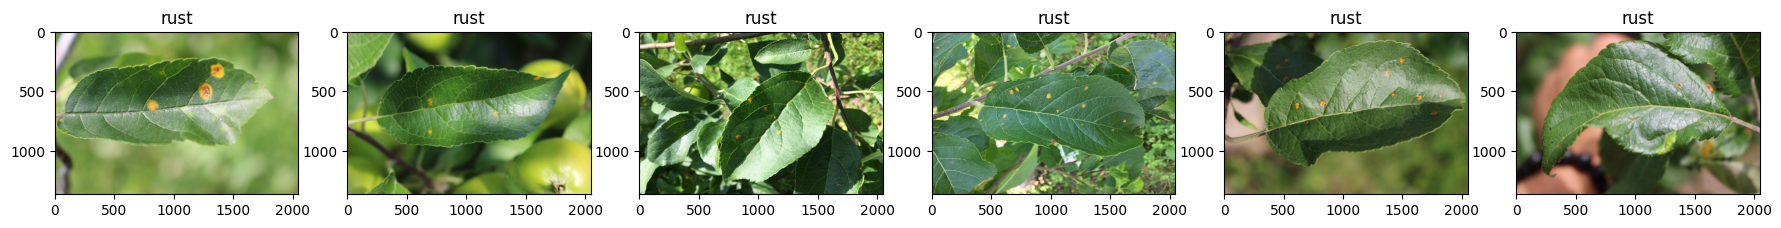

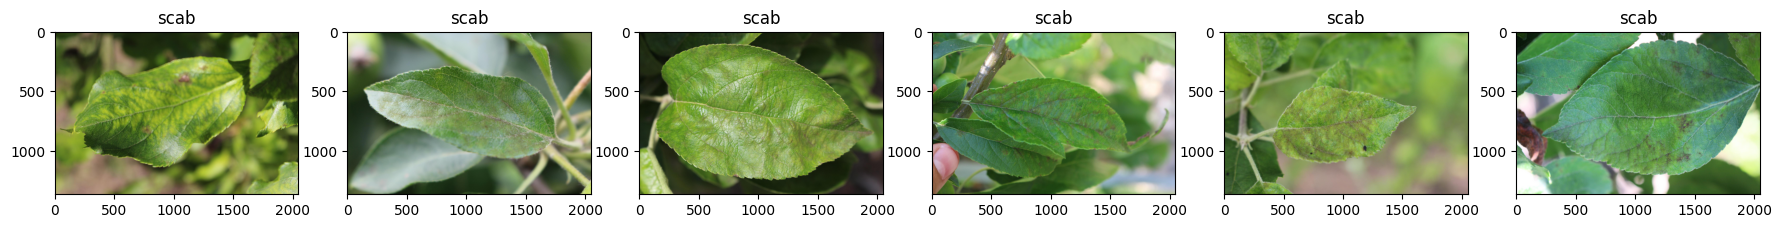

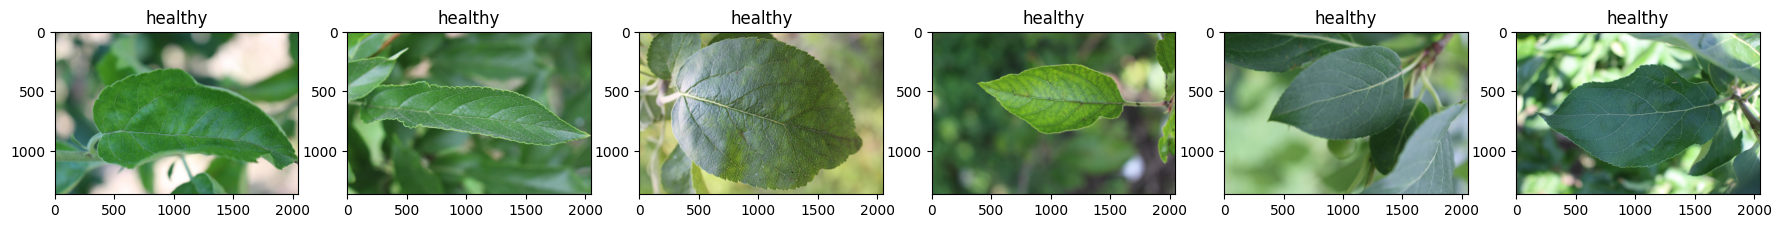

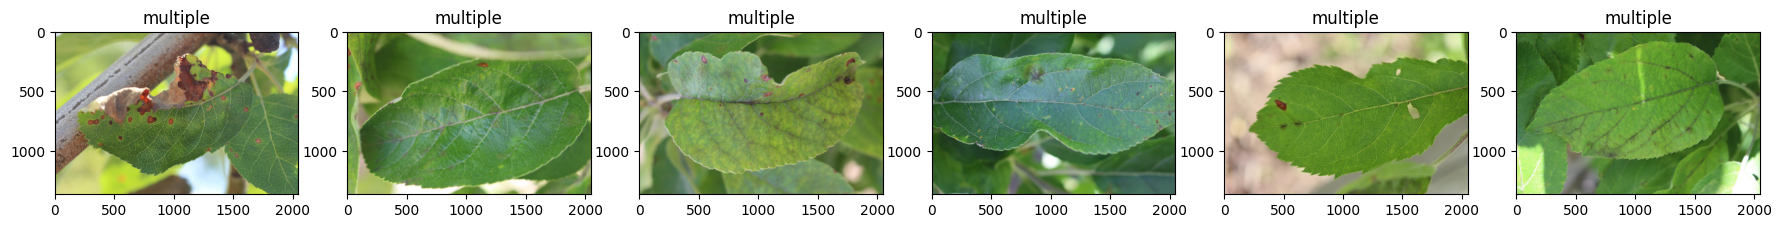

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def show_grid_images(image_path_list, augmentor=None, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        #axs[i].axis('off')
        axs[i].set_title(title)
        print(image.shape)
        
rust_image_list = train_df[train_df['label']=='rust']['path'].iloc[:6].tolist()
scab_image_list = train_df[train_df['label']=='scab']['path'].iloc[:6].tolist()
healthy_image_list = train_df[train_df['label']=='healthy']['path'].iloc[:6].tolist()
multiple_image_list = train_df[train_df['label']=='multiple_diseases']['path'].iloc[:6].tolist()

show_grid_images(rust_image_list, ncols=6, title='rust')
show_grid_images(scab_image_list, ncols=6, title='scab')
show_grid_images(healthy_image_list, ncols=6, title='healthy')
show_grid_images(multiple_image_list, ncols=6, title='multiple')

### ☑️이미지 Augmentation 적용
* cutout과 같은 noise는 나뭇잎의 병균 반점과 헷갈릴 수 있으므로 사용하지 않음. 
* 전체 이미지가 파란색 계열이고 병균 반점이 특정 색깔을 가지고 있으므로 색상의 변화는 적용하지 않음. 
* 전반적으로 판별하려는 나뭇잎이 전체 이미지의 중앙에 와있음. scale등의 적용 고려. 

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)
(1365, 2048, 3)


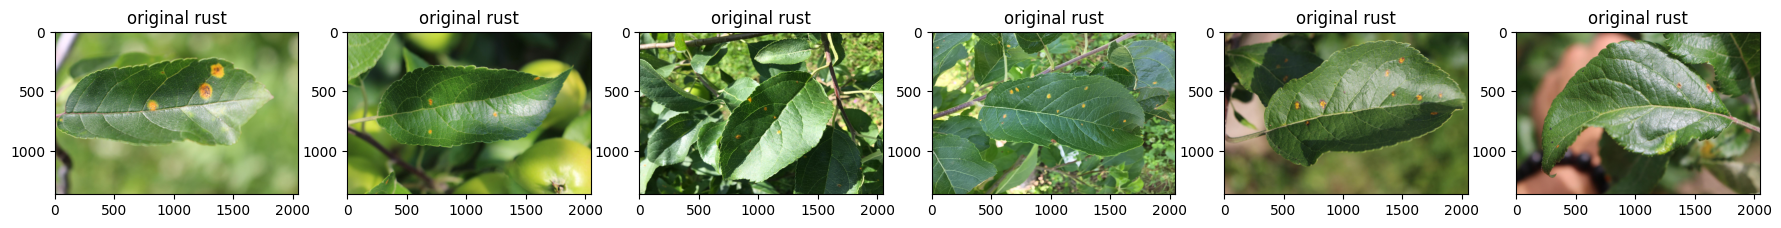

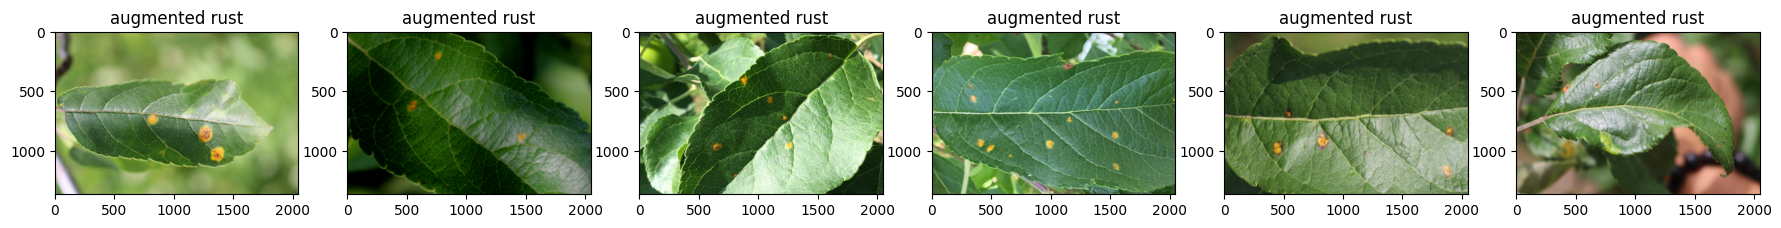

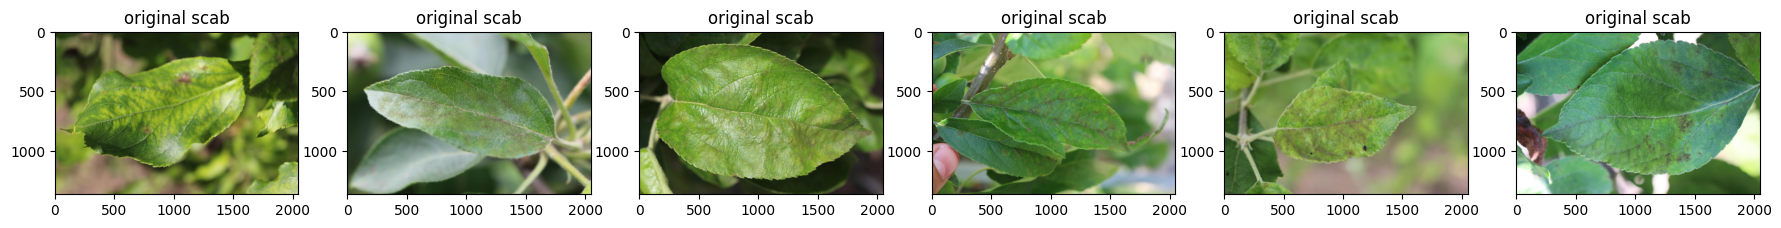

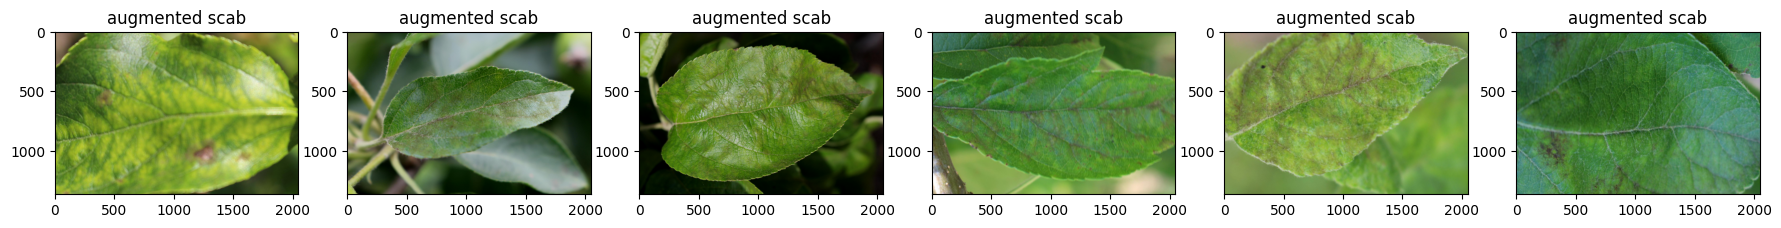

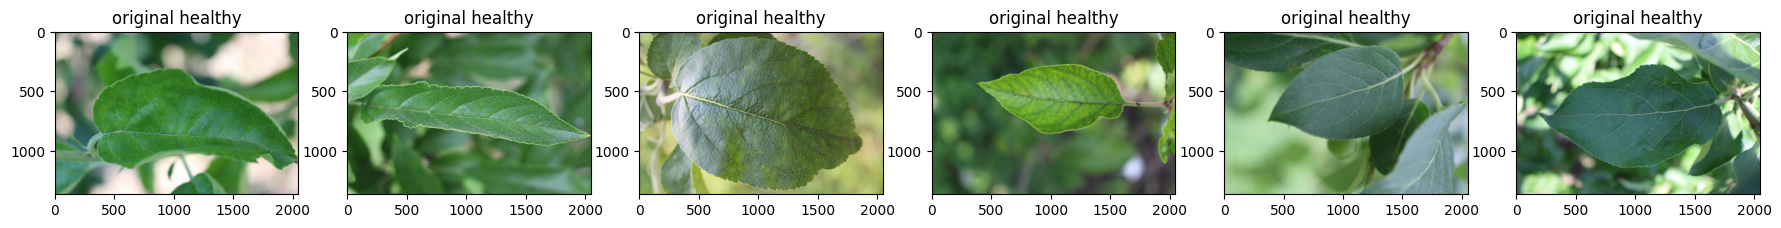

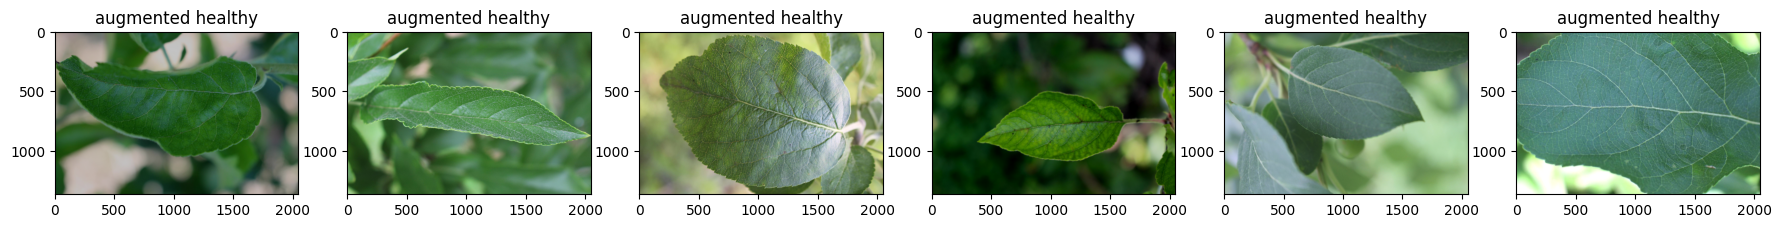

In [9]:
import albumentations as A

augmentor_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(scale_limit=(0.7, 0.9), p=0.5, rotate_limit=30),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
    A.Blur(p=0.2)
])

show_grid_images(rust_image_list, augmentor=None, ncols=6, title='original rust')
show_grid_images(rust_image_list, augmentor=augmentor_01, ncols=6, title='augmented rust')

show_grid_images(scab_image_list, augmentor=None, ncols=6, title='original scab')
show_grid_images(scab_image_list, augmentor=augmentor_01, ncols=6, title='augmented scab')

show_grid_images(healthy_image_list, augmentor=None, ncols=6, title='original healthy')
show_grid_images(healthy_image_list, augmentor=augmentor_01, ncols=6, title='augmented healthy')

### ⭐Sequence기반 Dataset 클래스 생성

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
import sklearn
import cv2

class Plant_Dataset(Sequence):
    def __init__(self, image_filenames, labels, image_size=(224, 224), batch_size=32, 
                 augmentor=None, pre_func=None):
        '''
        파라미터 설명
        image_filenames: opencv로 image를 로드할 파일의 절대 경로들
        labels: 해당 image의 label들
        batch_size: __getitem__(self, index) 호출 시 마다 가져올 데이터 batch 건수
        augmentor: albumentations 객체
        '''
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.pre_func = pre_func
        
    
    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    
    def __getitem__(self, index):

        start_idx = index * self.batch_size
        end_idx = (index+1) * self.batch_size
        image_name_batch = self.image_filenames[start_idx:end_idx]
        
        if self.labels is not None:
            label_batch = self.labels[start_idx:end_idx]
        else: 
            label_batch = None

        # albumentations를 사용하려면 image 컨테이너를 수동으로 설정해야 함
        image_batch = np.zeros((len(image_name_batch), self.image_size[0], self.image_size[1], 3), dtype='float32')
        
        for i, image_path in enumerate(image_name_batch):
            image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

            # 이미지 증강 적용
            if self.augmentor is not None:
                image = self.augmentor(image=image)['image']

            # 이미지 리사이징
            image = cv2.resize(image, (self.image_size[1], self.image_size[0]))

            # 이미지 전처리 적용
            if self.pre_func is not None:
                image = self.pre_func(image)
                
            image_batch[i] = image
            
        if self.labels is None: return image_batch
        else: return image_batch, label_batch

In [9]:
sample_df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/sample_submission.csv')
sample_df.head()

image_id  healthy  multiple_diseases  rust  scab
0   Test_0     0.25               0.25  0.25  0.25
1   Test_1     0.25               0.25  0.25  0.25
2   Test_2     0.25               0.25  0.25  0.25
3   Test_3     0.25               0.25  0.25  0.25
4   Test_4     0.25               0.25  0.25  0.25

### ✅ train, valid dataset 생성

In [10]:
from sklearn.model_selection import train_test_split

def get_train_valid(train_df, valid_size=0.2, random_state=2024):
    train_path = train_df['path'].values
    train_label = train_df[['healthy', 'multiple_diseases', 'rust', 'scab']].values
    
    tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, 
                                                              test_size=valid_size, 
                                                              random_state=random_state)
    print('tr_path shape:', tr_path.shape, 'tr_label shape:', tr_label.shape, 'val_path shape:', val_path.shape, 'val_label shape:', val_label.shape)
    return tr_path, val_path, tr_label, val_label

In [11]:
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input
from tensorflow.keras.applications.resnet_v2 import preprocess_input as res_preprocess_input
import albumentations as A

In [12]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

augmentor_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(scale_limit=(0.7, 0.9), p=0.5, rotate_limit=30),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
    A.Blur(p=0.2)
])

tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)

tr_ds = Plant_Dataset(tr_path, tr_label, 
                      image_size=IMAGE_SIZE, 
                      batch_size=BATCH_SIZE, 
                      augmentor=augmentor_01, 
                      pre_func=xcp_preprocess_input)
val_ds = Plant_Dataset(val_path, val_label, 
                       image_size=IMAGE_SIZE, 
                       batch_size=BATCH_SIZE, 
                       augmentor=None,
                       pre_func=xcp_preprocess_input)

tr_image_batch, tr_label_batch = next(iter(tr_ds))
val_image_batch, val_label_batch = next(iter(val_ds))
print(tr_image_batch.shape, val_image_batch.shape)
print(tr_label_batch.shape, val_label_batch.shape)
# print(tr_image_batch[0], val_image_batch[0])

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
(32, 224, 224, 3) (32, 224, 224, 3)
(32, 4) (32, 4)


### ⭐create_model() 함수 생성
* resnet50v2, xception, efficientnetb0~b7 등의 Pretrained 모델을 생성 

In [13]:
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.metrics import AUC

from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
import tensorflow as tf


def create_model(model_type='efficientnetb0', in_shape=(224, 224, 3), n_classes=4):
    
    input_tensor = Input(shape=in_shape)

    if model_type == 'resnet50v2':
        base_model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'xception':
        base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb0':
        base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb1':
        base_model = tf.keras.applications.EfficientNetB1(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb2':
        base_model = tf.keras.applications.EfficientNetB2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb3':
        base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb4':
        base_model = tf.keras.applications.EfficientNetB4(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb5':
        base_model = tf.keras.applications.EfficientNetB5(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb6':
        base_model = tf.keras.applications.EfficientNetB6(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb7':
        base_model = tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_tensor=input_tensor)
        
    x = base_model.output  
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)    
    preds = Dense(units=n_classes, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=preds)
    
    return model

## 🗨️ Baseline 
- xception과 resnet50v2, efficientnetb0으로 모델 성능 확인

### ☑️xception 모델 학습
* image size는 224x224로 생성. 
* Learning Rate Scheduler는 ReduceLROnPlateau로, 초기 Learning Rate는 0.0001로 설정. 
* epochs는 10회만 설정. 
* metrics는 ROC-AUC 설정

In [16]:
from tensorflow.keras.metrics import AUC

xcp_model_01 = create_model(model_type='xception', in_shape=(224, 224, 3))
xcp_model_01.compile(optimizer=Adam(learning_rate=0.0001), 
                     loss='categorical_crossentropy', 
                     metrics=[AUC()])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

history = xcp_model_01.fit(tr_ds, epochs=10, 
               validation_data=val_ds,
               callbacks=([rlr_cb, ely_cb]), verbose=1)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733359556.549569     167 service.cc:145] XLA service 0x7f0f14022360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733359556.549651     167 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733359556.549658     167 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1733359589.509614     167 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/46 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - auc: 0.7557 - loss: 1.1245 - val_auc: 0.9298 - val_loss: 0.8171 - learning_rate: 1.0000e-04
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - auc: 0.9760 - loss: 0.3640 - val_auc: 0.9611 - val_loss: 0.5471 - learning_rate: 1.0000e-04
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - auc: 0.9876 - loss: 0.2647 - val_auc: 0.9700 - val_loss: 0.4297 - learning_rate: 1.0000e-04
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - auc: 0.9914 - loss: 0.2081 - val_auc: 0.9755 - val_loss: 0.3780 - learning_rate: 1.0000e-04
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - auc: 0.9972 - loss: 0.1323 - val_auc: 0.9758 - val_loss: 0.3472 - learning_rate: 1.0000e-04
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - auc: 0.9968 - loss: 0.1152 - val_auc: 0.9738 - val_loss: 0.3640 - learning_rate: 1.0000e-04
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - auc: 0.9970 - loss: 0.1141 - val_auc: 0.9855 - val_loss: 0.2675 - learning_rate: 1.0000e-04
Ep

### ☑️캐글에 제출할 submit csv 파일 만들기
* 테스트용 DataFrame에 이미지 경로 추가. 
* 테스트용 Dataset 생성. label은 테스트 데이터에서 알 수 없으므로 None으로 입력

In [34]:
IMAGE_DIR = '/kaggle/input/plant-pathology-2020-fgvc7/images'
test_df = pd.read_csv("../input/plant-pathology-2020-fgvc7/test.csv")
test_df['path'] = IMAGE_DIR + '/' + test_df['image_id'] + '.jpg'
test_df.head(10)

image_id                                                        path
0   Test_0  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_0.jpg
1   Test_1  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_1.jpg
2   Test_2  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_2.jpg
3   Test_3  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_3.jpg
4   Test_4  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_4.jpg
5   Test_5  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_5.jpg
6   Test_6  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_6.jpg
7   Test_7  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_7.jpg
8   Test_8  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_8.jpg
9   Test_9  /kaggle/input/plant-pathology-2020-fgvc7/images/Test_9.jpg

In [18]:
# test dataset 생성
test_path = test_df['path'].values
test_ds = Plant_Dataset(image_filenames=test_path, 
                        labels=None, 
                        image_size=IMAGE_SIZE, 
                        batch_size=BATCH_SIZE, 
                        augmentor=None, 
                        pre_func=xcp_preprocess_input)

preds = xcp_model_01.predict(test_ds)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step 


In [20]:
preds_df = pd.DataFrame(preds)
preds_df.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
preds_df.head()

healthy  multiple_diseases      rust          scab
0  0.000180       5.846044e-04  0.999207  2.876887e-05
1  0.000046       1.675403e-03  0.998268  1.010002e-05
2  0.000009       1.009794e-06  0.000002  9.999884e-01
3  0.999997       2.917093e-08  0.000003  2.050605e-07
4  0.000004       4.214139e-05  0.999953  6.237640e-07

In [21]:
submit_df = pd.concat([test_df['image_id'], preds_df], axis = 1)
submit_df.head()

image_id   healthy  multiple_diseases      rust          scab
0   Test_0  0.000180       5.846044e-04  0.999207  2.876887e-05
1   Test_1  0.000046       1.675403e-03  0.998268  1.010002e-05
2   Test_2  0.000009       1.009794e-06  0.000002  9.999884e-01
3   Test_3  0.999997       2.917093e-08  0.000003  2.050605e-07
4   Test_4  0.000004       4.214139e-05  0.999953  6.237640e-07

In [ ]:
submit_df.to_csv('submit_01.csv', index=False)

### ⭐ submit csv 파일 생성 함수

In [22]:
def make_submit_df(test_df, model, PRE_FUNC):
    test_path = test_df['path'].values
    test_ds = Plant_Dataset(image_filenames=test_path, 
                            labels=None, 
                            image_size=IMAGE_SIZE, 
                            batch_size=BATCH_SIZE, 
                            augmentor=None, 
                            pre_func=PRE_FUNC)
    
    preds = model.predict(test_ds)
    preds_df = pd.DataFrame(preds)
    preds_df.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
    submit_df = pd.concat([test_df['image_id'], preds_df], axis = 1)
    
    return submit_df

In [23]:
submit_df = make_submit_df(test_df, xcp_model_01, xcp_preprocess_input)
submit_df.to_csv('submit_xcp_01.csv', index=False)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 480ms/step


### ☑️resnet50v2 모델 학습
* image size는 224x224로 생성. 
* Learning Rate Scheduler는 ReduceLROnPlateau로, 초기 Learning Rate는 0.0001로 설정. 
* epochs는 10회만 설정.
* metrics는 ROC-AUC 설정.

In [24]:
tr_ds = Plant_Dataset(tr_path, tr_label, 
                      image_size=IMAGE_SIZE, 
                      batch_size=BATCH_SIZE, 
                      augmentor=augmentor_01, 
                      pre_func=res_preprocess_input)
val_ds = Plant_Dataset(val_path, val_label, 
                       image_size=IMAGE_SIZE, 
                       batch_size=BATCH_SIZE, 
                       augmentor=None,
                       pre_func=res_preprocess_input)

In [25]:
from tensorflow.keras.metrics import AUC

res_model_01 = create_model(model_type='resnet50v2', in_shape=(224, 224, 3))
res_model_01.compile(optimizer=Adam(learning_rate=0.0001), 
                     loss='categorical_crossentropy', 
                     metrics=[AUC()])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

history = res_model_01.fit(tr_ds, epochs=10, 
                           validation_data=val_ds,
                           callbacks=([rlr_cb, ely_cb]), verbose=1)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - auc_1: 0.7664 - loss: 1.1152 - val_auc_1: 0.9053 - val_loss: 1.1079 - learning_rate: 1.0000e-04
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - auc_1: 0.9669 - loss: 0.4360 - val_auc_1: 0.9572 - val_loss: 0.6043 - learning_rate: 1.0000e-04
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - auc_1: 0.9754 - loss: 0.3434 - val_auc_1: 0.9418 - val_loss: 0.7779 - learning_rate: 1.0000e-04
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - auc_1: 0.9838 - loss: 0.2889 - val_auc_1: 0.9629 - val_loss: 0.5703 - learning_rate: 1.0000e-04
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - auc_1: 0.9937 - loss: 0.1824 - val_auc_1: 0.9700 - val_loss: 0.4526 - learning_rate: 1.0000e-04
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - auc_1: 0.9919 - loss: 0.1881 - val_auc_1: 0.9722 - val_loss: 0.4416 - learning_rate: 1.0000e-04
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - auc_1: 0.9965 - loss: 0.1211 - val_auc_1: 0.9709 - val_loss: 0.5005 - 

In [31]:
history.history.keys()

dict_keys(['auc_1', 'loss', 'val_auc_1', 'val_loss', 'learning_rate'])

In [19]:
import matplotlib.pyplot as plt

def plot_training_history(history, auc='auc', val_auc='val_auc'):
    # 손실 그래프
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Valid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # AUC 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history[auc], label='Train')
    plt.plot(history.history[val_auc], label='Valid')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.title('Training and Validation AUC')
    plt.legend()

    # 그래프 출력
    plt.tight_layout()
    plt.show()

In [ ]:
plot_training_history(history)

In [26]:
submit_df = make_submit_df(test_df, res_model_01, res_preprocess_input)
submit_df.to_csv('submit_res_01.csv', index=False)

57/57 ━━━━━━━━━━━━━━━━━━━━ 33s 536ms/step


### ☑️efficientnetb0 모델 학습
* image size는 224x224로 생성. 
* Learning Rate Scheduler는 ReduceLROnPlateau로, 초기 Learning Rate는 0.0001로 설정. 
* epochs는 10회만 설정.
* metrics는 ROC-AUC 설정.

In [14]:
tr_ds = Plant_Dataset(tr_path, tr_label, 
                      image_size=IMAGE_SIZE, 
                      batch_size=BATCH_SIZE, 
                      augmentor=augmentor_01, 
                      pre_func=eff_preprocess_input)
val_ds = Plant_Dataset(val_path, val_label, 
                       image_size=IMAGE_SIZE, 
                       batch_size=BATCH_SIZE, 
                       augmentor=None,
                       pre_func=eff_preprocess_input)

In [15]:
eff_model_01 = create_model(model_type='efficientnetb0', in_shape=(224, 224, 3))
eff_model_01.compile(optimizer=Adam(learning_rate=0.0001), 
                     loss='categorical_crossentropy', 
                     metrics=[AUC(name='auc')])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

history = eff_model_01.fit(tr_ds, epochs=10, 
                           validation_data=val_ds,
                           callbacks=([rlr_cb, ely_cb]), verbose=1)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733451273.922322     134 service.cc:145] XLA service 0x7c45dc004280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733451273.922377     134 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733451273.922381     134 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1733451322.342825     134 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/46 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - auc: 0.7898 - loss: 1.0900 - val_auc: 0.9401 - val_loss: 0.6761 - learning_rate: 1.0000e-04
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 47s 890ms/step - auc: 0.9650 - loss: 0.4528 - val_auc: 0.9678 - val_loss: 0.4085 - learning_rate: 1.0000e-04
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 39s 734ms/step - auc: 0.9844 - loss: 0.2881 - val_auc: 0.9765 - val_loss: 0.3409 - learning_rate: 1.0000e-04
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 38s 716ms/step - auc: 0.9889 - loss: 0.2416 - val_auc: 0.9795 - val_loss: 0.2804 - learning_rate: 1.0000e-04
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 38s 709ms/step - auc: 0.9946 - loss: 0.1802 - val_auc: 0.9815 - val_loss: 0.2572 - learning_rate: 1.0000e-04
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 39s 732ms/step - auc: 0.9959 - loss: 0.1430 - val_auc: 0.9816 - val_loss: 0.2530 - learning_rate: 1.0000e-04
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 39s 729ms/step - auc: 0.9976 - loss: 0.1106 - val_auc: 0.9825 - val_loss: 0.2729 - learning_r

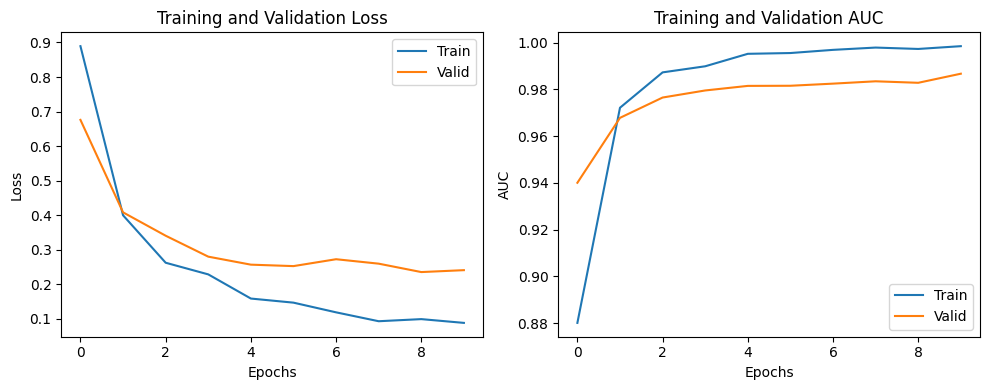

In [20]:
plot_training_history(history)

In [ ]:
submit_df = make_submit_df(test_df, eff_model_01, eff_preprocess_input)
submit_df.to_csv('submit_effb0_01.csv', index=False)

- Xception : 0.935, 0.927
- ResNet50V2 : 0.926, 0.930
- EfficientNetB0 : 0.922, 0.937

## 🗨️ image 사이즈를 변경하여 재 학습
* xception 모델을 사용하되 원본 이미지(1365, 2048)의 ratio를 어느 정도 유지하면서 변경. 이미지 사이즈를 320, 512로 변경.
* 성능이 가장 좋았던 xception 모델 적용

In [21]:
IMAGE_SIZE = (320, 512)
BATCH_SIZE = 32

tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)

tr_ds = Plant_Dataset(tr_path, tr_label, 
                      image_size=IMAGE_SIZE, 
                      batch_size=BATCH_SIZE, 
                      augmentor=augmentor_01, 
                      pre_func=xcp_preprocess_input)
val_ds = Plant_Dataset(val_path, val_label, 
                       image_size=IMAGE_SIZE, 
                       batch_size=BATCH_SIZE, 
                       augmentor=None,
                       pre_func=xcp_preprocess_input)

tr_image_batch, tr_label_batch = next(iter(tr_ds))
val_image_batch, val_label_batch = next(iter(val_ds))
print(tr_image_batch.shape, val_image_batch.shape, tr_label_batch.shape, val_label_batch.shape)
# print(tr_image_batch[0], val_image_batch[0])

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
(32, 320, 512, 3) (32, 320, 512, 3) (32, 4) (32, 4)


### ✅Config 를 이용하여 학습 수행. 
* 모델은 xception, image size는 (320, 512), 
* 초기 LR은 0.0001, LR Scheduler는 Ramp up and Step decay, 
* epochs는 10회, fine tuning을 적용하지 않음.
* augmentor는 앞에서 설정한 augmentor_01 적용. 

In [22]:
def lrfn_01(epoch):
    LR_START = 1e-5
    LR_MAX = 1e-4
    LR_RAMPUP_EPOCHS = 2
    LR_SUSTAIN_EPOCHS = 1
    LR_STEP_DECAY = 0.75
    
    def calc_fn(epoch):
        if epoch < LR_RAMPUP_EPOCHS:
            lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
        elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
            lr = LR_MAX
        else:
            lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
        return lr
    
    return calc_fn(epoch)

def lrfn_02(epoch):
    LR_START = 1e-6
    LR_MAX = 2e-5
    LR_RAMPUP_EPOCHS = 2
    LR_SUSTAIN_EPOCHS = 1
    LR_STEP_DECAY = 0.75
    
    def calc_fn(epoch):
        if epoch < LR_RAMPUP_EPOCHS:
            lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
        elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
            lr = LR_MAX
        else:
            lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
        return lr
    
    return calc_fn(epoch)

lr01_cb = tf.keras.callbacks.LearningRateScheduler(lrfn_01, verbose=1)
lr02_cb = tf.keras.callbacks.LearningRateScheduler(lrfn_02, verbose=1)
rlr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
ely_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

augmentor_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(scale_limit=(0.7, 0.9), p=0.5, rotate_limit=30),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
    A.Blur(p=0.2)
])

# Config 생성. 
class Config:
    MODEL_TYPE = 'xception'
    IMAGE_SIZE = (320, 512)
    BATCH_SIZE = 16
    N_EPOCHS = 10 
    FIRST_CALLBACKS = [lr01_cb, ely_cb]
    SECOND_CALLBACKS = [lr02_cb, ely_cb]
    AUGMENTOR = augmentor_01
    PRE_FUNC = xcp_preprocess_input
    INITIAL_LR = 0.0001
    DEBUG = False

In [23]:
def train_model(train_df, config=Config):
    
    tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)
    
    tr_ds = Plant_Dataset(tr_path, tr_label, 
                          image_size=config.IMAGE_SIZE, 
                          batch_size=config.BATCH_SIZE, 
                          augmentor=config.AUGMENTOR, 
                          pre_func=config.PRE_FUNC)
    val_ds = Plant_Dataset(val_path, val_label, 
                           image_size=config.IMAGE_SIZE, 
                           batch_size=config.BATCH_SIZE, 
                           augmentor=None, 
                           pre_func=config.PRE_FUNC)
    
    if config.DEBUG:
        tr_image_batch = next(iter(tr_ds))[0]
        val_image_batch = next(iter(val_ds))[0]
        print(tr_image_batch.shape, val_image_batch.shape)
        print(tr_image_batch[0], val_image_batch[0])
        
    print('#######', config.MODEL_TYPE, ' 생성 및 학습 수행 ########')
    model = create_model(model_type=config.MODEL_TYPE, in_shape=(config.IMAGE_SIZE[0], config.IMAGE_SIZE[1], 3), n_classes=4)
    model.compile(optimizer=Adam(learning_rate=config.INITIAL_LR), 
                  loss='categorical_crossentropy', 
                  metrics=[AUC()])
    
    print('####### 학습을 시작합니다. ########')
    history = model.fit(tr_ds, epochs=config.N_EPOCHS, 
                   validation_data=val_ds, 
                   callbacks=(config.FIRST_CALLBACKS), verbose=1)
        
    return model, history

In [24]:
import os
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # INFO 메시지를 제외하고 WARNING과 ERROR 메시지만 표시
tf.get_logger().setLevel('WARNING')

### ☑️resize xeception 모델 학습

In [25]:
xcp_model_02, history = train_model(train_df, config=Config)

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
####### xception  생성 및 학습 수행 ########
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
####### 학습을 시작합니다. ########

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


91/91 ━━━━━━━━━━━━━━━━━━━━ 152s 930ms/step - auc: 0.6498 - loss: 1.2995 - val_auc: 0.8500 - val_loss: 1.0798 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 5.5e-05.
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 74s 781ms/step - auc: 0.8924 - loss: 0.8287 - val_auc: 0.9624 - val_loss: 0.4606 - learning_rate: 5.5000e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 76s 801ms/step - auc: 0.9761 - loss: 0.3541 - val_auc: 0.9868 - val_loss: 0.2390 - learning_rate: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 77s 812ms/step - auc: 0.9887 - loss: 0.2193 - val_auc: 0.9830 - val_loss: 0.2755 - learning_rate: 1.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0001.
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 79s 832ms/step - auc: 0.9940 - loss: 0.1598 - val_auc: 0.9915 - val_loss: 0.1685 - learning_rate: 1.0000e-04

Epoch 6: Lear

In [26]:
history.history.keys()

dict_keys(['auc', 'loss', 'val_auc', 'val_loss', 'learning_rate'])

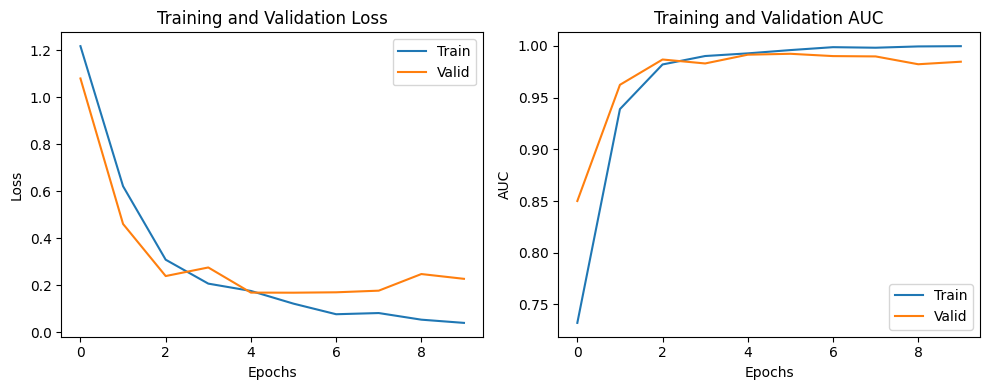

In [27]:
plot_training_history(history)

In [28]:
def make_submit_df(test_df, model, config=Config):
    test_path = test_df['path'].values
    test_ds = Plant_Dataset(image_filenames=test_path, 
                            labels=None, 
                            image_size=config.IMAGE_SIZE, 
                            batch_size=config.BATCH_SIZE, 
                            augmentor=None,
                            pre_func=config.PRE_FUNC)
    preds = model.predict(test_ds)
    
    preds_df = pd.DataFrame(preds)
    preds_df.columns = ['healthy', 'multiple_diseases', 'rust', 'scab']
    submit_df = pd.concat([test_df['image_id'], preds_df], axis = 1)
    
    return submit_df

In [ ]:
submit_df = make_submit_df(test_df, xcp_model_02, config=Config)
submit_df.to_csv('submit_xcp_02.csv', index=False)

- resizing xception : 0.948, 0.960

### ☑️resize EfficientNetB3 모델 학습

In [29]:
class Config:
    MODEL_TYPE = 'efficientnetb3'
    IMAGE_SIZE = (320, 512)
    BATCH_SIZE = 16
    N_EPOCHS = 10 
    FIRST_CALLBACKS = [lr01_cb, ely_cb] 
    SECOND_CALLBACKS = [lr02_cb, ely_cb] 
    AUGMENTOR = augmentor_01
    PRE_FUNC = eff_preprocess_input
    INITIAL_LR = 0.0001
    DEBUG = False

In [30]:
effb3_model, history = train_model(train_df, config=Config)

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
####### efficientnetb3  생성 및 학습 수행 ########
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
####### 학습을 시작합니다. ########

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


91/91 ━━━━━━━━━━━━━━━━━━━━ 212s 671ms/step - auc_1: 0.5054 - loss: 1.4409 - val_auc_1: 0.7013 - val_loss: 1.2838 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 5.5e-05.
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 47s 481ms/step - auc_1: 0.8796 - loss: 0.9312 - val_auc_1: 0.9672 - val_loss: 0.3816 - learning_rate: 5.5000e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 45s 468ms/step - auc_1: 0.9779 - loss: 0.3330 - val_auc_1: 0.9823 - val_loss: 0.2615 - learning_rate: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 47s 482ms/step - auc_1: 0.9939 - loss: 0.1839 - val_auc_1: 0.9869 - val_loss: 0.2448 - learning_rate: 1.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0001.
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 46s 469ms/step - auc_1: 0.9966 - loss: 0.1377 - val_auc_1: 0.9852 - val_loss: 0.2825 - learning_rate: 1.000

In [31]:
history.history.keys()

dict_keys(['auc_1', 'loss', 'val_auc_1', 'val_loss', 'learning_rate'])

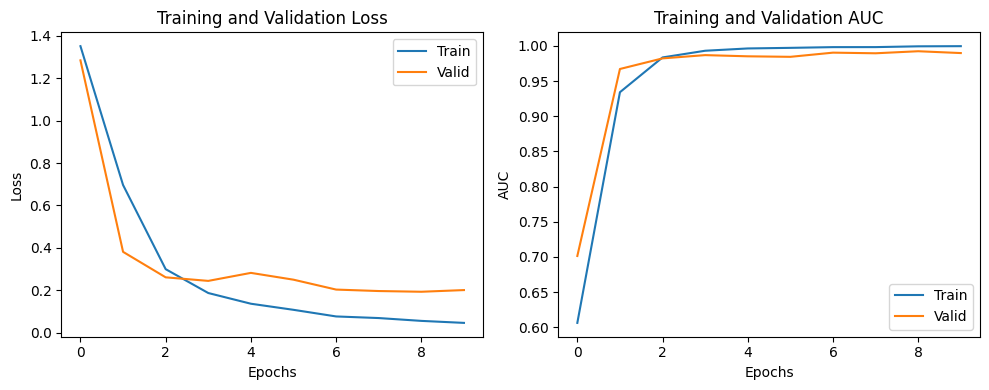

In [32]:
plot_training_history(history, "auc_1", "val_auc_1")

In [35]:
submit_df = make_submit_df(test_df, effb3_model, config=Config)
submit_df.to_csv('submit_effb3.csv', index=False)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 53s 412ms/step


- resize effb3 : 0.948, 0.952

### ☑️resize EfficientNetB5 모델 학습
* IMAGE_SIZE는 (456, 456)으로 증가.  

In [36]:
class Config:
    MODEL_TYPE = 'efficientnetb5'
    IMAGE_SIZE = (456, 456)
    BATCH_SIZE = 8
    N_EPOCHS = 10 
    FIRST_CALLBACKS = [lr01_cb, ely_cb]
    SECOND_CALLBACKS = [lr02_cb, ely_cb] 
    AUGMENTOR = augmentor_01
    PRE_FUNC = eff_preprocess_input
    INITIAL_LR = 0.0001
    DEBUG = False

In [ ]:
effb5_model, history = train_model(train_df, config=Config)

tr_path shape: (1456,) tr_label shape: (1456, 4) val_path shape: (365,) val_label shape: (365, 4)
####### efficientnetb5  생성 및 학습 수행 ########
115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
####### 학습을 시작합니다. ########

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733454271.237118     131 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 40 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 24 bytes spill stores, 24 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_6', 32 bytes spill stores, 32 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_10', 32 bytes spill stores, 32 bytes spill loads
ptxas warning : Registers are 

182/182 ━━━━━━━━━━━━━━━━━━━━ 349s 639ms/step - auc_2: 0.6071 - loss: 1.3384 - val_auc_2: 0.9117 - val_loss: 1.0045 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 5.5e-05.
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 102s 554ms/step - auc_2: 0.9317 - loss: 0.7070 - val_auc_2: 0.9804 - val_loss: 0.2736 - learning_rate: 5.5000e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 107s 581ms/step - auc_2: 0.9834 - loss: 0.2871 - val_auc_2: 0.9811 - val_loss: 0.3273 - learning_rate: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 108s 588ms/step - auc_2: 0.9920 - loss: 0.2083 - val_auc_2: 0.9830 - val_loss: 0.2854 - learning_rate: 1.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0001.
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 109s 592ms/step - auc_2: 0.9971 - loss: 0.1283 - val_auc_2: 0.9799 - val_loss: 0.4023 - learni

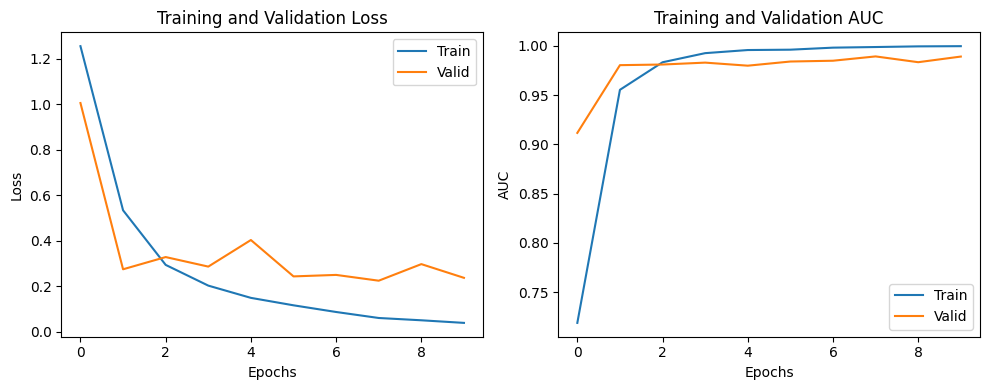

In [38]:
plot_training_history(history, "auc_2", "val_auc_2")

In [39]:
submit_df = make_submit_df(test_df, effb5_model, config=Config)
submit_df.to_csv('submit_effb5.csv', index=False)

228/228 ━━━━━━━━━━━━━━━━━━━━ 45s 160ms/step


- effb5 : 0.945, 0.954